Краткий обзор рассмотренных моделей: 

Ближайшие соседи
Подходит для небольших наборов данных, хорош в качестве базовой модели.

Линейные модели(Регрессия)
Хорош для очень больших наборов данных, подходит для данных с очень высокой размерностью.

Наивный байесовский классификатор
Подходит только для классификации. Работает даже быстрее, чем линейные модели, хорош для очень больших наборов данных и высокоразмерных данных. Часто менее точен, чем линейные модели.

Деревья решений
Очень быстрый метод, не нужно масштабировать данные, результаты можно визуализировать и легко объяснить.

Случайные леса
Почти всегда работают лучше, чем одно дерево решений, очень устойчивый и мощный метод. Не нужно масштабировать данные. 
Плохо работает с данными очень высокой размерности и разреженными данными.

Машины опорных векторов
Мощный метод для работы с наборами данных среднего размера и признаками, измеренными в едином масштабе. Требует масштабирования данных, чувствителен к изменению параметров.


Задание для практических работ:

Задание 1. Для выбранного и предобработанного датасета из лабораторной работы 1, учитывая особенности моделей:
Произвести классификацию используя:
    1. Наивный баессовский классификатор
    2. Метод k-ближайших соседей
    3.  Метод опорных векторов
    4. Деревья решений и случайные леса 

Задание 2. На наборе данных Boston Housing https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset сравнить работу алгоритмов линейной регрессии, гребневой регрессии (L2 -регуляризации), лассо-регрессии (L1 регуляризации )

Задание 3. Используя небор данных Breast Cancer Wisconsin (Diagnostic) Dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data  сравнить работу алгоритмов k-средних, DBSCAN и агломеративной кластеризации

# Задание 1

In [12]:
# 1. Наивный баессовский классификатор
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
# Загрузить данные
df = pd.read_csv("insurance_data.csv")
features = df[['bloodpressure']]
print(features.values)
# Создать вектор бинарных целей
target = df['diabetic']
# Создать объект бернуллиева наивного Байеса с априорными вероятностями каждого класса 
clf = BernoulliNB()
# Натренировать модель
model = clf.fit(features, target)
new_observation = [[80],[85],[90],[87],[77],[95],[82],[100],[96],[84]]
model.predict(new_observation)

[[ 91]
 [ 87]
 [ 82]
 ...
 [ 91]
 [106]
 [101]]


C:\Users\vadim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype='<U3')

In [13]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

Правильность на тестовом наборе: 0.52


In [14]:
# 2. Метод k-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(df[['bloodpressure']], df['diabetic'], random_state=0)
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
X_new = np.array([[80],[85],[90],[87],[77],[95],[82],[100],[96],[84]])
print("форма массива X_new: {}".format(X_new.shape))
#Делаем прогноз
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))
#print("Спрогнозированная метка: {}".format(df['diabetic'][prediction]))

форма массива X_new: (10, 1)
Прогноз: ['Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No']


C:\Users\vadim\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\vadim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.47


C:\Users\vadim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [22]:
# 3. Метод опорных векторов
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
 # Воспользуемся настройками по умолчанию библиотеки Seaborn
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC
sns.set()
# Загрузить данные всего с двумя классами и двумя признаками 
features = df[['bmi','bloodpressure']]
target = df['diabetic']
# Стнадартизировать признаки 
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
# Создать опорно-векторный классификатор 
svc = LinearSVC(C=1.0)
# Натренировать модель
model = svc.fit(features_standardized, target)

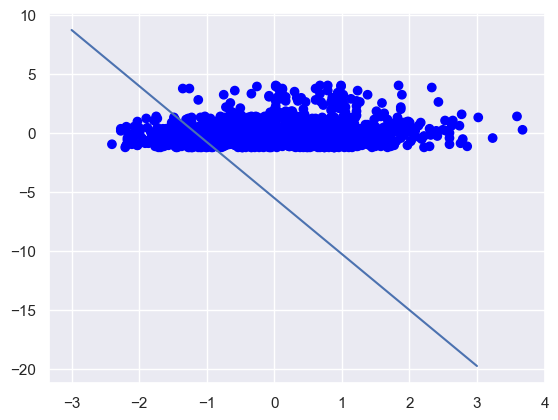

In [23]:
from matplotlib import pyplot as pit


# Вывести точки данных на график и расцветить, используя их класс 
color = ["red" if C == 10 else "blue" for C in target] 
pit.scatter(features_standardized[:,-0], features_standardized[:,1], c=color)

# Создать гиперплоскость 
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(3, -3)
yy = a * xx-(svc.intercept_[0]) / w[1]

# Начертить гиперплоскость 
pit.plot(xx, yy)
pit.show ()

In [24]:
# 4. Деревья решений и случайные леса
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
df1 = df.var()
print(df1)
X, y = df1(n_samples=100, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

index            1.497450e+05
PatientID        1.497450e+05
age              1.232294e+02
bmi              3.729221e+01
bloodpressure    1.307526e+02
children         1.452830e+00
claim            1.466426e+08
dtype: float64


C:\Users\vadim\AppData\Local\Temp\ipykernel_13560\2835999778.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = df.var()


TypeError: 'Series' object is not callable

# Задание 2

Задание 2. На наборе данных Boston Housing https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset 
сравнить работу алгоритмов линейной регрессии, гребневой регрессии (L2 -регуляризации), лассо-регрессии (L1 регуляризации )

In [69]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

C:\Users\vadim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Text(0, 0.5, 'MEDV')

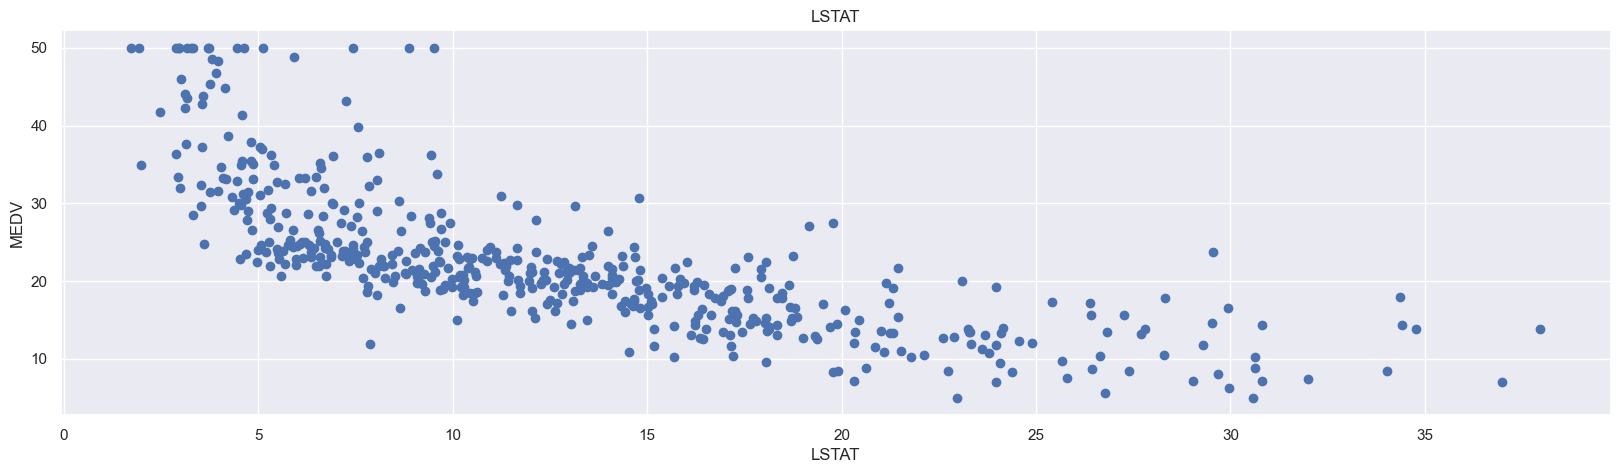

In [41]:
boston['MEDV'] = boston_dataset.target
plt.figure(figsize=(20, 5))
features = ['LSTAT']
target = boston['MEDV']
plt.subplot(1, len(features) , 1)
x = boston[col]
y = target
plt.scatter(x, y, marker='o')
plt.title(col)
plt.xlabel(col)
plt.ylabel('MEDV')

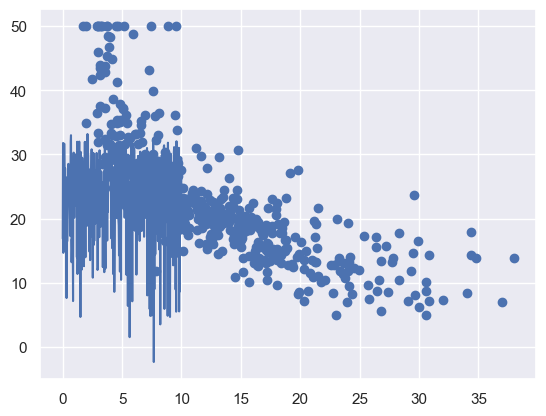

In [60]:
# линейная регрессия
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(np.c_[boston['LSTAT']], columns = ['LSTAT'])
Y = boston['MEDV']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
model = LinearRegression()
model.fit(X_train, Y_train)
yfit = model.predict(X_train)
xfit = np.linspace(0, 10, 404)
plt.scatter(X, Y)
plt.plot(xfit, yfit)


C:\Users\vadim\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.19551e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


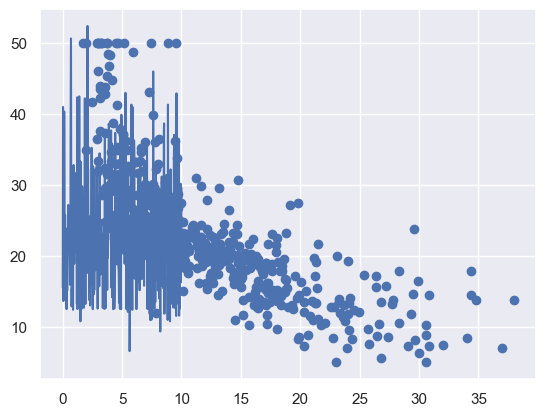

In [58]:
# гребневая регрессия
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(7), Ridge(alpha=0.1))
model.fit(X_train, Y_train)
yfit = model.predict(X_train)
xfit = np.linspace(0, 10, 404)
plt.scatter(X, Y)
plt.plot(xfit, yfit)

C:\Users\vadim\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.795e+03, tolerance: 3.470e+00
  model = cd_fast.enet_coordinate_descent(


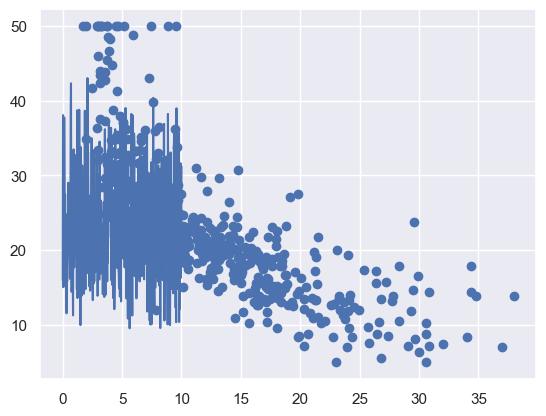

In [65]:
# лассо-регрессии
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(7), Lasso(alpha=0.001))
model.fit(X_train, Y_train)
yfit = model.predict(X_train)
xfit = np.linspace(0, 10, 404)
plt.scatter(X, Y)
plt.plot(xfit, yfit)

# Задание 3

Задание 3. Используя небор данных Breast Cancer Wisconsin (Diagnostic) Dataset https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data сравнить работу алгоритмов k-средних, DBSCAN и агломеративной кластеризации

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # для стилизации графиков
import numpy as np

df = pd.read_csv("data.csv")
x_axis = df.data[:, 4]  # Sepal Length
y_axis = df.data[:, 5]  # Sepal Width

# Построение
plt.xlabel(df.feature_names[0])
plt.ylabel(df.feature_names[1])
plt.scatter(x_axis, y_axis, c=df.target)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'data'